In [1]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree


In [2]:
df = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [3]:
# grabbing all columns 
my_list = df.columns.values.tolist()
my_list

['ID',
 'Country',
 'Province/State',
 'Study Pop Size (N)',
 'Positive/negative cases',
 'Mean Age',
 'Male',
 'White or European',
 'African American',
 'Asian',
 'Hispanic or Latino',
 'Multiple ethnicities or other',
 'Smoking history',
 'Hypertension',
 'Diabetes',
 'Cardiovascular Disease (incl. CAD)',
 'Chronic obstructive lung (COPD)',
 'Cancer (Any)',
 'Liver Disease (any)',
 'Cerebrovascular Disease',
 'Chronic kidney/renal disease',
 'Other',
 'Fever (temperature ≥37·3°C)',
 'Respiratory rate > 24 breaths per min',
 'Cough',
 'Shortness of Breath (dyspnoea)',
 'Headache',
 'Sputum (/Expectoration)',
 'Myalgia (Muscle Pain)',
 'Fatigue',
 'Upper air-way congestion',
 'Diarrhoea',
 'Nausea or Vomiting',
 'Loss of Appetite/Anorexia',
 'Sore Throat/Stuffy Nose',
 'Chills',
 'Chest Pain',
 'Loss of smell/taste',
 'Disease Severity Asymptomatic',
 'Mortality']

In [4]:
# # selecting all rows and 4th column onwards. columns 0-3 does not provide necessary data for ML
# selected = df.iloc[:,4:]
# selected

In [5]:
df.isnull()


,ID,Country,Province/State,Study Pop Size (N),Positive/negative cases,Mean Age,Male,White or European,African American,Asian,...,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste,Disease Severity Asymptomatic,Mortality
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1159,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1160,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1161,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
dropped_df = df.dropna()

Calculate Linear Regression with Age vs Mortality Risk 

In [7]:
renamed = dropped_df.rename(columns={"Mean Age": "Age"})

In [8]:
age = renamed[['Age','Mortality']]
age

,Age,Mortality
0,56.0,0.28
1,69.0,1.00
2,52.0,0.00
3,58.0,0.16
4,59.0,0.15
...,...,...
1151,64.0,0.13
1152,56.0,0.15
1153,63.0,0.13
1154,62.0,0.31


In [144]:
age.describe()

,Age,Mortality
count,1116.000000,1116.000000
mean,45.318996,0.127455
std,19.934656,0.261423
min,0.000000,0.000000
25%,35.000000,0.000000
50%,49.000000,0.000000
75%,60.000000,0.130000
max,80.000000,1.000000


In [73]:
X = age[["Age"]]
y = age[["Mortality"]]
print(X.shape, y.shape)

(1116, 1) (1116, 1)


In [74]:
copy_data= X.copy()

In [76]:
data_encoded = pd.get_dummies(copy_data,columns=["Age"])
data_encoded

,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_12.0,...,Age_70.0,Age_71.0,Age_72.0,Age_73.0,Age_74.0,Age_75.0,Age_76.0,Age_78.0,Age_79.0,Age_80.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
data_encoded.sum(axis = 0, skipna = True) 

Age_0.0     20
Age_1.0      8
Age_2.0      4
Age_3.0      8
Age_6.0     16
            ..
Age_75.0     8
Age_76.0     4
Age_78.0     4
Age_79.0     8
Age_80.0     4
Length: 70, dtype: int64

In [99]:
data_encoded['Mortality']=y
data_encoded

,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_12.0,...,Age_71.0,Age_72.0,Age_73.0,Age_74.0,Age_75.0,Age_76.0,Age_78.0,Age_79.0,Age_80.0,Mortality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.13
1152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.15
1153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.13
1154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.31


In [101]:
binaryM = data_encoded[(data_encoded["Mortality"]==1)|(data_encoded["Mortality"]==0)]
binaryM

,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_12.0,...,Age_71.0,Age_72.0,Age_73.0,Age_74.0,Age_75.0,Age_76.0,Age_78.0,Age_79.0,Age_80.0,Mortality
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [105]:
# avoid dummy variable trap 
data = binaryM.drop("Age_22.0", axis=1)

In [106]:
target=binaryM['Mortality']
target_names=['risk','not_risk']
data = binaryM.drop("Mortality", axis=1)
feature_names = data.columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [107]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9553072625698324

In [109]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
# all over the place

[(0.20919240432343786, 'Age_70.0'),
 (0.1612328507117691, 'Age_73.0'),
 (0.13714044638774364, 'Age_71.0'),
 (0.09261802188184798, 'Age_76.0'),
 (0.08610754882153389, 'Age_62.0'),
 (0.07320117010648071, 'Age_79.0'),
 (0.06889633021464014, 'Age_72.0'),
 (0.04662757292102527, 'Age_80.0'),
 (0.04553704194468051, 'Age_22.0'),
 (0.03178410565201146, 'Age_69.0'),
 (0.022653290712746056, 'Age_68.0'),
 (0.011680079574903314, 'Age_23.0'),
 (0.0024687749304825733, 'Age_45.0'),
 (0.0010695151755060989, 'Age_50.0'),
 (0.0010235881143075244, 'Age_0.0'),
 (0.0008634322491132544, 'Age_46.0'),
 (0.0006385302793986424, 'Age_35.0'),
 (0.0005623836575668366, 'Age_37.0'),
 (0.000437914101012218, 'Age_49.0'),
 (0.0004361372163798294, 'Age_63.0'),
 (0.0003849377975094048, 'Age_47.0'),
 (0.00038359035760198405, 'Age_48.0'),
 (0.00035645636578696095, 'Age_36.0'),
 (0.0003492914380290887, 'Age_16.0'),
 (0.00034181888754221385, 'Age_10.0'),
 (0.0003227732652661169, 'Age_40.0'),
 (0.0003175862126757526, 'Age_42.0

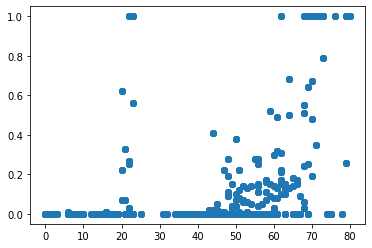

In [110]:
plt.scatter(X,y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [64]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[0.00531205]]
y-axis intercept:  [-0.10925323]


In [68]:
# predict when age is 100 
model.predict([[100]])

array([[0.42195226]])

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
# Use our model to make predictions
predicted = model.predict(X_test)

In [14]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.05425995492679869
R-squared (R2): 0.09045524656095338


In [15]:
model.score(X_test, y_test)
# really poor model for linear regression when comparing age vs mortality

0.09045524656095338

Calculate Risk factors 

In [16]:
riskfactors = renamed.iloc[:,[5,6,12,13,14,16,17,18,19,20,21,39]]
riskfactors

,Age,Male,Smoking history,Hypertension,Diabetes,Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Mortality
0,56.0,119,11.0,57.0,36.0,6.0,3.0,0.0,0.0,3.0,23.0,0.28
1,69.0,134,5.0,26.0,17.0,4.0,0.0,0.0,0.0,2.0,11.0,1.00
2,52.0,113,6.0,32.0,19.0,2.0,10.0,0.0,0.0,0.0,11.0,0.00
3,58.0,115,0.0,0.0,23.0,0.0,6.0,0.0,13.0,0.0,0.0,0.16
4,59.0,118,0.0,0.0,10.0,0.0,5.0,0.0,5.0,0.0,0.0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,64.0,124,0.0,30.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13
1152,56.0,109,32.0,75.0,39.0,10.0,4.0,2.0,0.0,12.0,25.0,0.15
1153,63.0,109,140.0,366.0,233.0,42.0,48.0,12.0,0.0,98.0,59.0,0.13
1154,62.0,129,56.0,157.0,100.0,14.0,14.0,4.0,0.0,27.0,29.0,0.31


In [17]:
binaryMortality = riskfactors[(riskfactors["Mortality"]==1)|(riskfactors["Mortality"]==0)]
binaryMortality

,Age,Male,Smoking history,Hypertension,Diabetes,Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Mortality
1,69.0,134,5.0,26.0,17.0,4.0,0.0,0.0,0.0,2.0,11.0,1.0
2,52.0,113,6.0,32.0,19.0,2.0,10.0,0.0,0.0,0.0,11.0,0.0
7,45.0,52,0.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
8,49.0,99,0.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,3.0,0.0
11,45.0,104,0.0,0.0,0.0,0.0,2.0,0.0,28.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1139,69.0,84,0.0,5.0,2.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0
1141,25.0,58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1142,43.0,84,0.0,23.0,11.0,8.0,0.0,10.0,0.0,4.0,11.0,0.0
1143,58.0,116,0.0,18.0,9.0,2.0,0.0,3.0,1.0,0.0,3.0,0.0


In [18]:
target=binaryMortality['Mortality']
target_names=['risk','not_risk']

In [19]:
data = binaryMortality.drop("Mortality", axis=1)
feature_names = data.columns

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

1.0

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [23]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.27438532234277313, 'Age'),
 (0.13296726833791908, 'Chronic obstructive lung (COPD)'),
 (0.12783562751714422, 'Chronic kidney/renal disease'),
 (0.11478428056127594, 'Male'),
 (0.06824908926896683, 'Hypertension'),
 (0.06713120853849495, 'Cerebrovascular Disease'),
 (0.056602956104368475, 'Diabetes'),
 (0.05397622624624871, 'Liver Disease (any)'),
 (0.049036207296174694, 'Cancer (Any)'),
 (0.030026936757742786, 'Smoking history'),
 (0.025004877028891256, 'Other')]

In [24]:
dropped_ageGender = binaryMortality.drop(["Age","Male"], axis=1)
dropped_ageGender

,Smoking history,Hypertension,Diabetes,Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Mortality
1,5.0,26.0,17.0,4.0,0.0,0.0,0.0,2.0,11.0,1.0
2,6.0,32.0,19.0,2.0,10.0,0.0,0.0,0.0,11.0,0.0
7,0.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,3.0,0.0
11,0.0,0.0,0.0,0.0,2.0,0.0,28.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1139,0.0,5.0,2.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0
1141,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1142,0.0,23.0,11.0,8.0,0.0,10.0,0.0,4.0,11.0,0.0
1143,0.0,18.0,9.0,2.0,0.0,3.0,1.0,0.0,3.0,0.0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dropped_ageGender, target, random_state=42)

In [26]:
target=dropped_ageGender['Mortality']
target_names=['risk','not_risk']

In [27]:
data = dropped_ageGender.drop("Mortality", axis=1)
feature_names = data.columns

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [30]:
#age and gender removed
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12853662914277394, 'Chronic obstructive lung (COPD)'),
 (0.08360480232373481, 'Chronic kidney/renal disease'),
 (0.041294639186579066, 'Cerebrovascular Disease'),
 (0.040903652636995295, 'Hypertension'),
 (0.036250006119455336, 'Liver Disease (any)'),
 (0.02840860979695804, 'Diabetes'),
 (0.02297867356995511, 'Smoking history'),
 (0.02226070037309085, 'Cancer (Any)'),
 (0.007697780942009993, 'Other')]

Risk based on symptoms 

In [35]:
riskSx = renamed.iloc[:,[5,6,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
riskSx

,Age,Male,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste,Disease Severity Asymptomatic,Mortality
0,56.0,119,180.0,55.0,151.0,0.0,0.0,44.0,29.0,44.0,0.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28
1,69.0,134,51.0,34.0,39.0,0.0,0.0,14.0,8.0,15.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
2,52.0,113,129.0,22.0,112.0,0.0,0.0,30.0,21.0,29.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,58.0,115,182.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.16
4,59.0,118,89.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,64.0,124,31.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13
1152,56.0,109,111.0,0.0,116.0,82.0,21.0,9.0,0.0,0.0,0.0,30.0,14.0,0.0,17.0,23.0,0.0,0.0,0.0,0.15
1153,63.0,109,448.0,0.0,450.0,376.0,64.0,57.0,0.0,0.0,0.0,156.0,138.0,0.0,48.0,120.0,0.0,0.0,0.0,0.13
1154,62.0,129,169.0,0.0,166.0,171.0,15.0,15.0,0.0,0.0,0.0,48.0,23.0,0.0,19.0,38.0,0.0,0.0,0.0,0.31


In [45]:
binaryMortality1 = riskSx[(riskSx["Mortality"]==1)|(riskSx["Mortality"]==0)]
target =binaryMortality1['Mortality']
target_names =['risk','not_risk']

In [49]:
data = binaryMortality1.drop("Mortality", axis=1)
feature_names = data.columns


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [51]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

1.0

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [53]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3652444152998728, 'Age'),
 (0.12748232802903403, 'Male'),
 (0.11125432438121456, 'Shortness of Breath (dyspnoea)'),
 (0.07789771189456504, 'Fever (temperature ≥37·3°C)'),
 (0.06133130952080834, 'Cough'),
 (0.05006634577807866, 'Fatigue'),
 (0.03667401021498254, 'Respiratory rate > 24 breaths per min'),
 (0.03432820176581324, 'Nausea or Vomiting'),
 (0.024882436532936814, 'Diarrhoea'),
 (0.022526421478171278, 'Chest Pain'),
 (0.021810412574734272, 'Sputum (/Expectoration)'),
 (0.018368277028484477, 'Headache'),
 (0.017697005419308152, 'Sore Throat/Stuffy Nose'),
 (0.016682722088452045, 'Myalgia (Muscle Pain)'),
 (0.006684592568356184, 'Loss of Appetite/Anorexia'),
 (0.004306162846788297, 'Chills'),
 (0.002063145665773493, 'Upper air-way congestion'),
 (0.0006981269343852775, 'Disease Severity Asymptomatic'),
 (2.0499782404543782e-06, 'Loss of smell/taste')]

In [54]:
dropped_ageGender1 = binaryMortality1.drop(["Age","Male"], axis=1)
dropped_ageGender1

,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste,Disease Severity Asymptomatic,Mortality
1,51.0,34.0,39.0,0.0,0.0,14.0,8.0,15.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,129.0,22.0,112.0,0.0,0.0,30.0,21.0,29.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
8,18.0,0.0,15.0,9.0,2.0,3.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,114.0,0.0,87.0,2.0,13.0,48.0,5.0,0.0,0.0,11.0,2.0,0.0,21.0,21.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,11.0,0.0,11.0,9.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1141,11.0,0.0,13.0,0.0,1.0,3.0,2.0,2.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0
1142,216.0,0.0,214.0,19.0,32.0,133.0,27.0,71.0,0.0,53.0,33.0,0.0,39.0,9.0,35.0,0.0,0.0,0.0
1143,70.0,0.0,65.0,30.0,11.0,51.0,21.0,36.0,0.0,17.0,10.0,0.0,13.0,4.0,26.0,0.0,0.0,0.0


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dropped_ageGender1, target, random_state=42)

In [58]:
target=dropped_ageGender1['Mortality']
target_names=['risk','not_risk']

In [59]:
data = dropped_ageGender1.drop("Mortality", axis=1)
feature_names = data.columns

In [60]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [62]:
#age and gender removed
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.07079138916234985, 'Shortness of Breath (dyspnoea)'),
 (0.04464559277407843, 'Respiratory rate > 24 breaths per min'),
 (0.04268597335748411, 'Cough'),
 (0.04059769204488233, 'Fever (temperature ≥37·3°C)'),
 (0.027517813433083918, 'Nausea or Vomiting'),
 (0.024572055496315633, 'Diarrhoea'),
 (0.020152164074559862, 'Fatigue'),
 (0.01958923932233018, 'Headache'),
 (0.01936839012105159, 'Sputum (/Expectoration)'),
 (0.01691253296220819, 'Chest Pain'),
 (0.010268718320583493, 'Sore Throat/Stuffy Nose'),
 (0.009581207045449883, 'Myalgia (Muscle Pain)'),
 (0.003148043083149378, 'Loss of Appetite/Anorexia'),
 (0.0013516921786643182, 'Chills'),
 (0.0005055512306638846, 'Upper air-way congestion'),
 (0.00031076797839712866, 'Disease Severity Asymptomatic'),
 (0.0, 'Loss of smell/taste')]

Converting age to binary